In [1]:
import sys
import os
import pandas as pd

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(os.path.join(parent_dir, 'scripts'))

import data_acquisition
import Dataframe
import feature_engineering
import Advanced_model
import Logistic_regressions
#import regression

Set API key

In [2]:
os.environ['api_key'] = 'Bgx9192SVK3nzJNLQcV5nneQS'
os.environ['COMET_API_KEY'] = 'Bgx9192SVK3nzJNLQcV5nneQS'

# Collecting Data

In [3]:
data_acquisition.collect_data()

The folder '../data/raw/2016_2017' already exists.
The folder '../data/raw/2017_2018' already exists.
The folder '../data/raw/2018_2019' already exists.
The folder '../data/raw/2019_2020' already exists.
The folder '../data/raw/2020_2021' already exists.


# Cleaning Data

In [4]:
## environ 2 minutes
base_path = '../data/raw/'
df = Dataframe.load_all_seasons(base_path)
transformed_df = Dataframe.transformEventData(df)

Seasons: 100%|██████████| 5/5 [01:02<00:00, 12.43s/it]               


# 2. Ingenierie des caracteristiques I

In [5]:
# Charger les données
data = pd.read_csv('../data/derivatives/dataframe.csv')
# Créer les nouvelles caractéristiques
feature_engineering.create_features1(data, '^201[6-9]02\d{4}$', 'features_train1.csv')

In [6]:
data = pd.read_csv('../data/derivatives/features_train1.csv')
data.head()
print(len(data.columns))
print(data.columns)
data.info()
data.head(10)

columns_with_nan = data.columns[data.isna().any()].tolist()

# Print columns with NaN values
print("\nColumns with NaN values:")
print(columns_with_nan)

4
Index(['distance_goal', 'angle_goal', 'is_goal', 'empty_goal'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305814 entries, 0 to 305813
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   distance_goal  305814 non-null  float64
 1   angle_goal     305814 non-null  float64
 2   is_goal        305814 non-null  int64  
 3   empty_goal     305814 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 9.3 MB

Columns with NaN values:
[]


# 3. Modele de base

hna2


C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy = 0.9064630577309811
Matrice de confusion = 
 [[55442     0]
 [ 5721     0]]
[[0.96236319 0.03763681]
 [0.87722423 0.12277577]
 [0.92584339 0.07415661]
 ...
 [0.86591354 0.13408646]
 [0.90182956 0.09817044]
 [0.81379669 0.18620331]]
AUC metric : {'Logistic regression using Distance': 0.7002776501598214}


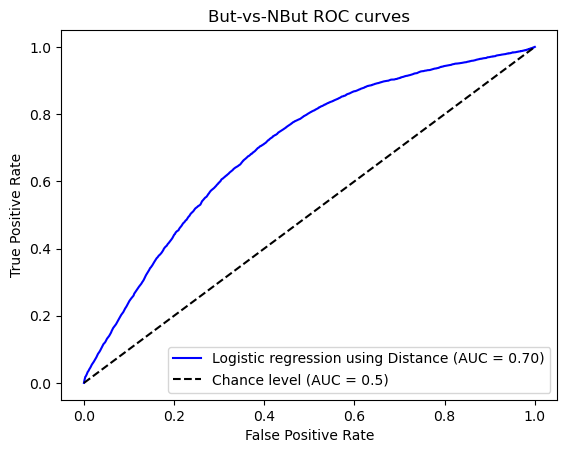

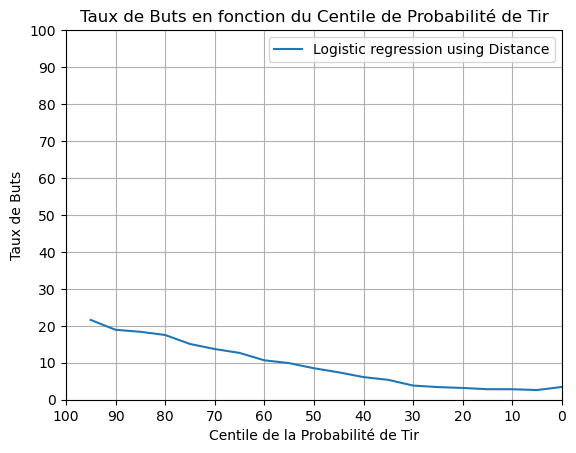

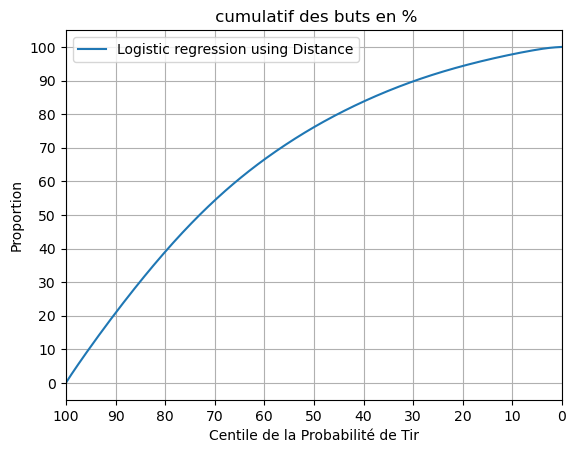

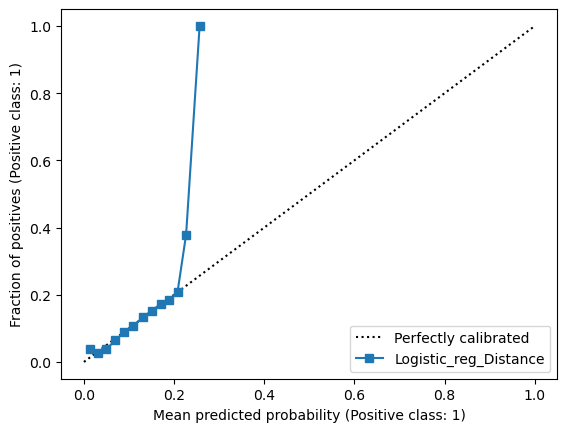

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/me-pic/milestone-2/2603f475d0ea4d118038edbac9cdc0c3

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/me-pic/milestone-2/2603f475d0ea4d118038edbac9cdc0c3
COMET INFO:   Metrics:
COMET INFO:     ROC AUC Score : 0.7002776501598214
COMET INFO:   Others:
COMET INFO:     Name : Logistic_reg_dist
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO: 

AUC metric : {'Logistic regression using Distance': 0.4970341570093761, 'Logistic regression using Angle': 0.5044234778761412, 'Logistic regression using Distance and Angle': 0.7003887056837936, 'Ligne de base aléatoire': 0.5047188051748512}


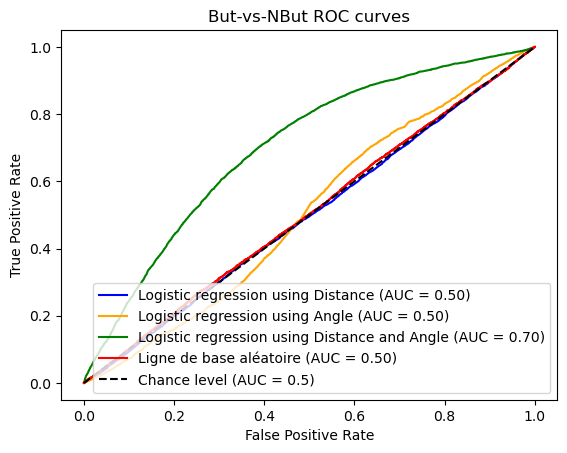

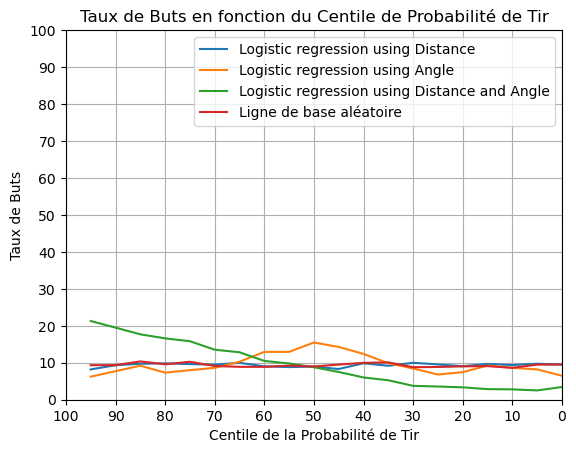

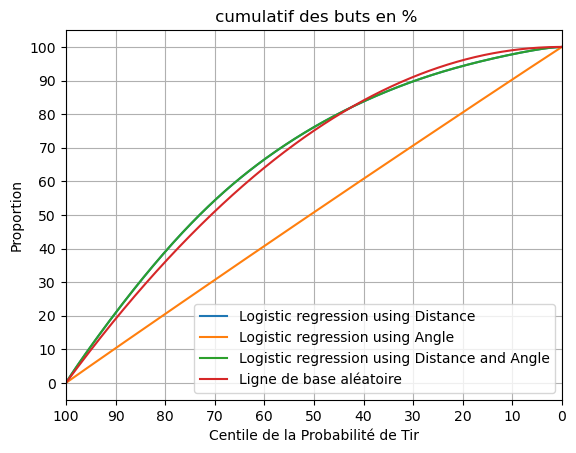

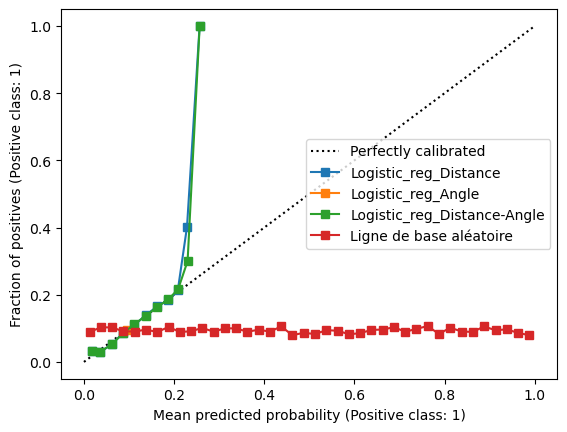

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/me-pic/milestone-2/4c551c230138496fa1235a2536d46552
COMET INFO:   Metrics:
COMET INFO:     ROC AUC Score : 0.5044234778761412
COMET INFO:   Others:
COMET INFO:     Name : Logistic_reg_angle
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : 1
COMET INFO:     dual              : False
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : 1
COMET INFO:     max_iter          : 100
COMET INFO:     multi_class       : auto
COMET INFO:     n_jobs            : 1
COMET INFO:     penalty           : l2
COMET INFO:     random_st

In [7]:
clf_1, clf_2, clf_3 = Logistic_regressions.runRegression()

# 4. Ingenierie des caracteristiques II

In [8]:
transformed_df = feature_engineering.transformEventData(df)
transformed_df.to_csv('../data/derivatives/dataframe_milestone_2.csv', index=False)

In [9]:
dataframe_milestone_1 = pd.read_csv('../data/derivatives/dataframe.csv')
dataframe_milestone_2 = pd.read_csv('../data/derivatives/dataframe_milestone_2.csv')

data = feature_engineering.create_features2(dataframe_milestone_2,dataframe_milestone_1, pattern='^201[6-9]02\d{4}$')
data.to_csv('../data/derivatives/dataframe_milestone_2.csv', index=False)

## fusion des features de ingénierie des caractéristiques 1 et 2
engineering1 = pd.read_csv('../data/derivatives/features_train1.csv')
engineering2 = pd.read_csv('../data/derivatives/dataframe_milestone_2.csv')

print(len(engineering1))
print(len(engineering2))

D:\UdeM\Automne2023\IFT6758-DataScience\Projet\ift6758-A08\scripts\feature_engineering.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  angle = np.arctan((y_goal - y)/(x_goal - np.abs(x)))
D:\UdeM\Automne2023\IFT6758-DataScience\Projet\ift6758-A08\scripts\feature_engineering.py:61: RuntimeWarning: invalid value encountered in scalar divide
  angle = np.arctan((y_goal - y)/(x_goal - np.abs(x)))


305814
305814


In [10]:
data_final_train = feature_engineering.fusion_features(engineering1, engineering2)
data_final_train.to_csv('../data/derivatives/train_data.csv', index=False)

In [11]:
# Question 5 :
feature_engineering.comet_log_dataframe_profile()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/me-pic/milestone-2/e7bff65c38f549e3b2fadbcf16f41073
COMET INFO:   Metrics:
COMET INFO:     ROC AUC Score : 0.7003887056837936
COMET INFO:   Others:
COMET INFO:     Name : Logistic_reg_dist_angle
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (2.08 MB)
COMET INFO:     installed packages           : 1
COMET INFO:     

In [15]:
data_final_train.head()
print(len(data_final_train.columns))

24


# 5. Advanced Model

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/me-pic/milestone-2/1252a3e3ab214685bb47aa14fce006bc

C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dt

ROC AUC Score: 0.5788408999617338


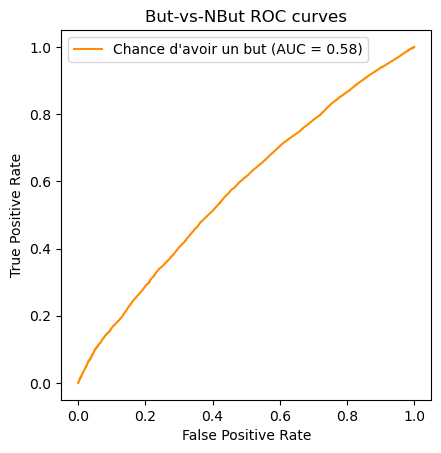

AUC metric : 0.5788408999617338


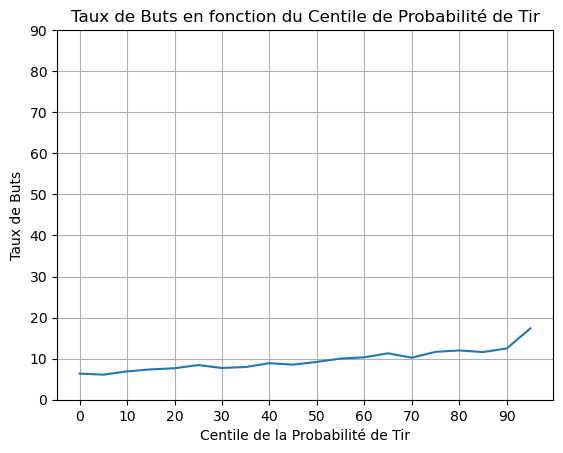

C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\User

ROC AUC Score: 0.581406429583998


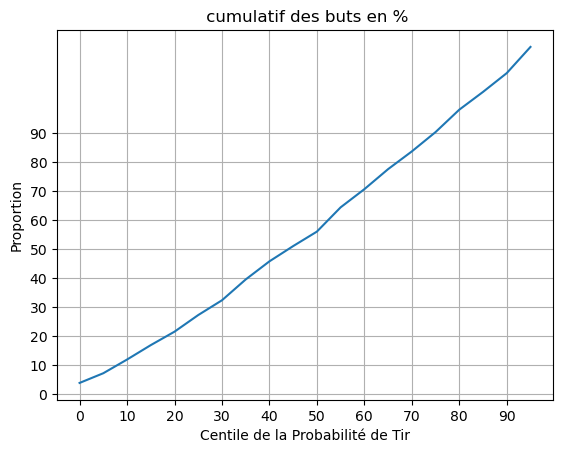

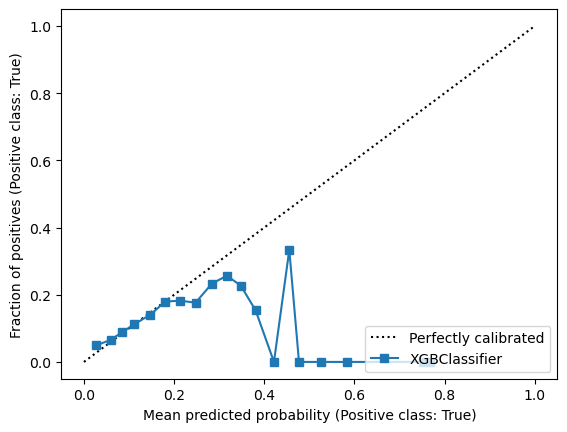

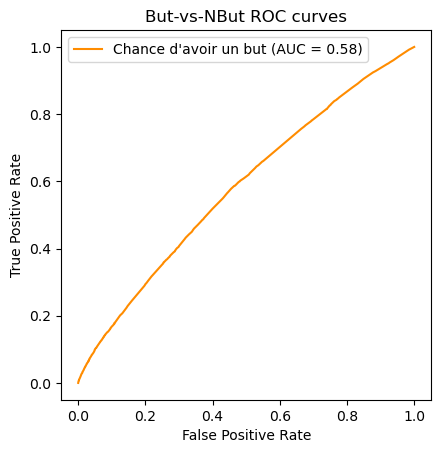

AUC metric : 0.581406429583998


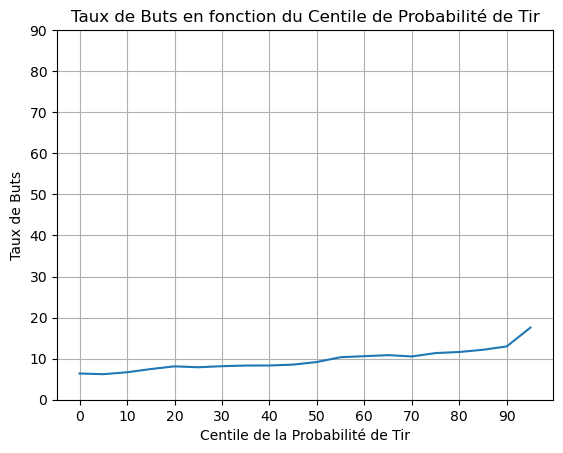

C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
COMET I

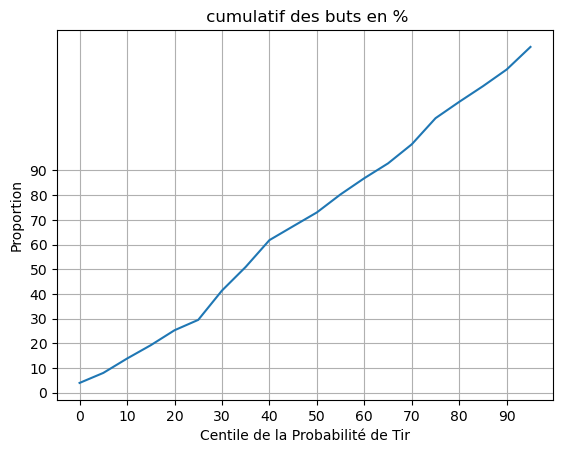

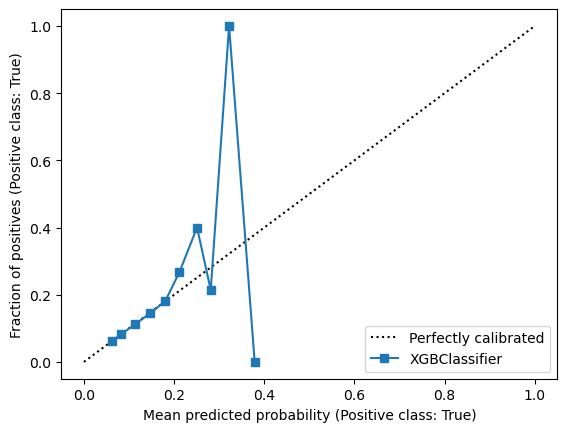

In [16]:
Advanced_model.xgboost()

# Faite votre mieux
Neural Network

In [17]:
current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(os.path.join(parent_dir, 'scripts'))
from scripts import model_nn_clf
from scripts import histGB

In [19]:
model_nn_clf.RunANN()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/me-pic/milestone-2/0edc79869734480db5ff0d8cfcb98b0d
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     Training Balanced Accuracy [3]   : (0.09135986011564111, 0.5023793814664578)
COMET INFO:     Training Loss [3]                : (242.4312286376953, 40043307008.0)
COMET INFO:     Validation Balanced Accuracy [3] : (0.09114407352344911, 0.9088559264765509)
COMET INFO:     Validation Loss [3]              : (21008631808.0, 8.5637778595432e+27)
COMET INFO:     loss                             : 242.4312286376953
COMET INFO:   Others:
COMET INFO:     Name : ANN
COMET INFO:   Parameters:
COMET INFO:     copy          : True
C

ANNModel(
  (layer_1): Linear(in_features=36, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=96, bias=True)
  (layer_4): Linear(in_features=96, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch: 0 | Training Loss: 242.43123, Training Balanced Accuracy: 0.50 | Validation Loss: 39985700864.00000, Validation Balanced Accuracy: 0.09


C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.

In [20]:
histGB.RunHistGB()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/me-pic/milestone-2/dd902a56607042c29b7416c750fe5594
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     Training Balanced Accuracy [3]   : (0.09135986011564111, 0.5023793814664578)
COMET INFO:     Training Loss [3]                : (242.4312286376953, 40043307008.0)
COMET INFO:     Validation Balanced Accuracy [3] : (0.09114407352344911, 0.9088559264765509)
COMET INFO:     Validation Loss [3]              : (21008631808.0, 8.5637778595432e+27)
COMET INFO:     loss                             : 242.4312286376953
COMET INFO:   Others:
COMET INFO:     Name : ANN
COMET INFO:   Parameters:
COMET INFO:     copy          : True
C

Loading data...
Splitting data...


COMET WARNING: truncated string; too long: 'HistGradientBoostingClassifier(categorical_features=['prd', 'noGoalie',
                                                     'rebond',
                                                     'shotCategory_Backhand',
                                                     'shotCategory_Deflected',
                                                     'shotCategory_Slap Shot',
                                                     'shotCategory_Snap Shot',
                                                     'shotCategory_Tip-In',
                                                     'shotCategory_Wrap-around',
                                                     'shotCategory_Wrist Shot',
                                                     'last_event_type_BLOCKED_SHOT',
                                                     'last_event_type_FACEOFF',
                                                     'last_event_type_GIVEAWAY',
                       

Defining hyperparameters...


ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py", line 233, in _check_categories
    is_categorical[feature_names.index(feature_name)] = True
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: 'prd' is not in list

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py", line 397, in fit
    self.is_categorical_, known_categories = self._check_categories(X)
                                             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py", line 235, in _check_categories
    raise ValueError(
ValueError: categorical_features has a item value 'prd' which is not a valid feature name of the training data. Observed feature names: ['index', 'coord_x', 'coord_y', 'last_event_x', 'last_event_y', 'time_since_last_event', 'distance_from_last_event', 'power_play_time_elapsed', 'home_team_skater_count', 'away_team_skater_count', 'game_seconds', 'shot_distance', 'shot_angle', 'rebond', 'changement_angle_tir', 'vitesse', 'distance_shot', 'angle_shot', 'is_goal', 'empty_net', 'shotCategory_Backhand', 'shotCategory_Deflected', 'shotCategory_Slap Shot', 'shotCategory_Snap Shot', 'shotCategory_Tip-In', 'shotCategory_Wrap-around', 'shotCategory_Wrist Shot', 'last_event_type_BLOCKED_SHOT', 'last_event_type_FACEOFF', 'last_event_type_GIVEAWAY', 'last_event_type_GOAL', 'last_event_type_HIT', 'last_event_type_MISSED_SHOT', 'last_event_type_PENALTY', 'last_event_type_SHOT', 'last_event_type_TAKEAWAY']
